# Detectron2: Detect objects from webcam videostream
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

## Inference with pre-trained model

In [1]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

import numpy as np
from IPython.display import clear_output, Image, display, HTML
import base64

In [3]:
# Create config
cfg = get_cfg()
# use pre-trained faster r-cnn with resnet-101 backend(backbone).
cfg.merge_from_file("./detectron2/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
# TODO: Tune threash hold for detected.png error region.
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model. Otherwise it shows all the low porobability regions.
#
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

In [4]:
# Create predictor
predictor = DefaultPredictor(cfg)

In [10]:
!ls

'All Thesis Results'
'All Thesis Results.zip'
 BlenderLearning
 cocoapi
 detected.png
 detectron2
 Detectron2_detect_objects_from_webcam_videostream.ipynb
 image.png
 nteract-0.22.4.appimage
 Object-Detection-and-Image-Segmentation-with-Detectron2-master
 Object-Detection-and-Image-Segmentation-with-Detectron2-master.zip
 PennFudanPed
 PennFudanPed.zip
 Profile.pdf
 segan+_generator.ckpt
 UnityHub.appimage
 UnityLearning
 UnrealEngine-release
 vision
 WebLearning


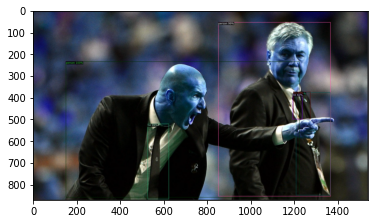

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
im = cv2.imread("./image.png")
outputs = predictor(im)  # get probabilities of location and class

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
image = v.get_image()[:, :, ::-1]
cv2.imwrite('detected.png', image)
plt.imshow(image)  # saved image correct. Fix it later.
plt.show()

In [5]:
def array_show(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

# !!!  NOTE: IT DOESN'T WORK WITH JUPYTER OR COLAB. needs a different a approach  !!!
cap = cv2.VideoCapture(0)

while True:
    ret, image = cap.read()
    
    outputs = predictor(image)

    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    img = array_show(v.get_image()[:, :, ::-1])
    display(img)